1. Your task is to apply k-means to the iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it's possible you may find a solution with more than 3 clusters that nevertheless better tracks the real, trinary outcome – two of those clusters may map to a single flower type while the other two map to the other types for example.

In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

import config

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Fit K-means with values 2-6 for K.

In [15]:
num_clust = np.arange(2,7,1)
kmeans_clust = []
for i in num_clust:
    kmeans = KMeans(n_clusters = i, random_state = 123)
    kmeans_clust.append(kmeans.fit_predict(X_scaled))
    

Now, to visualize the results:

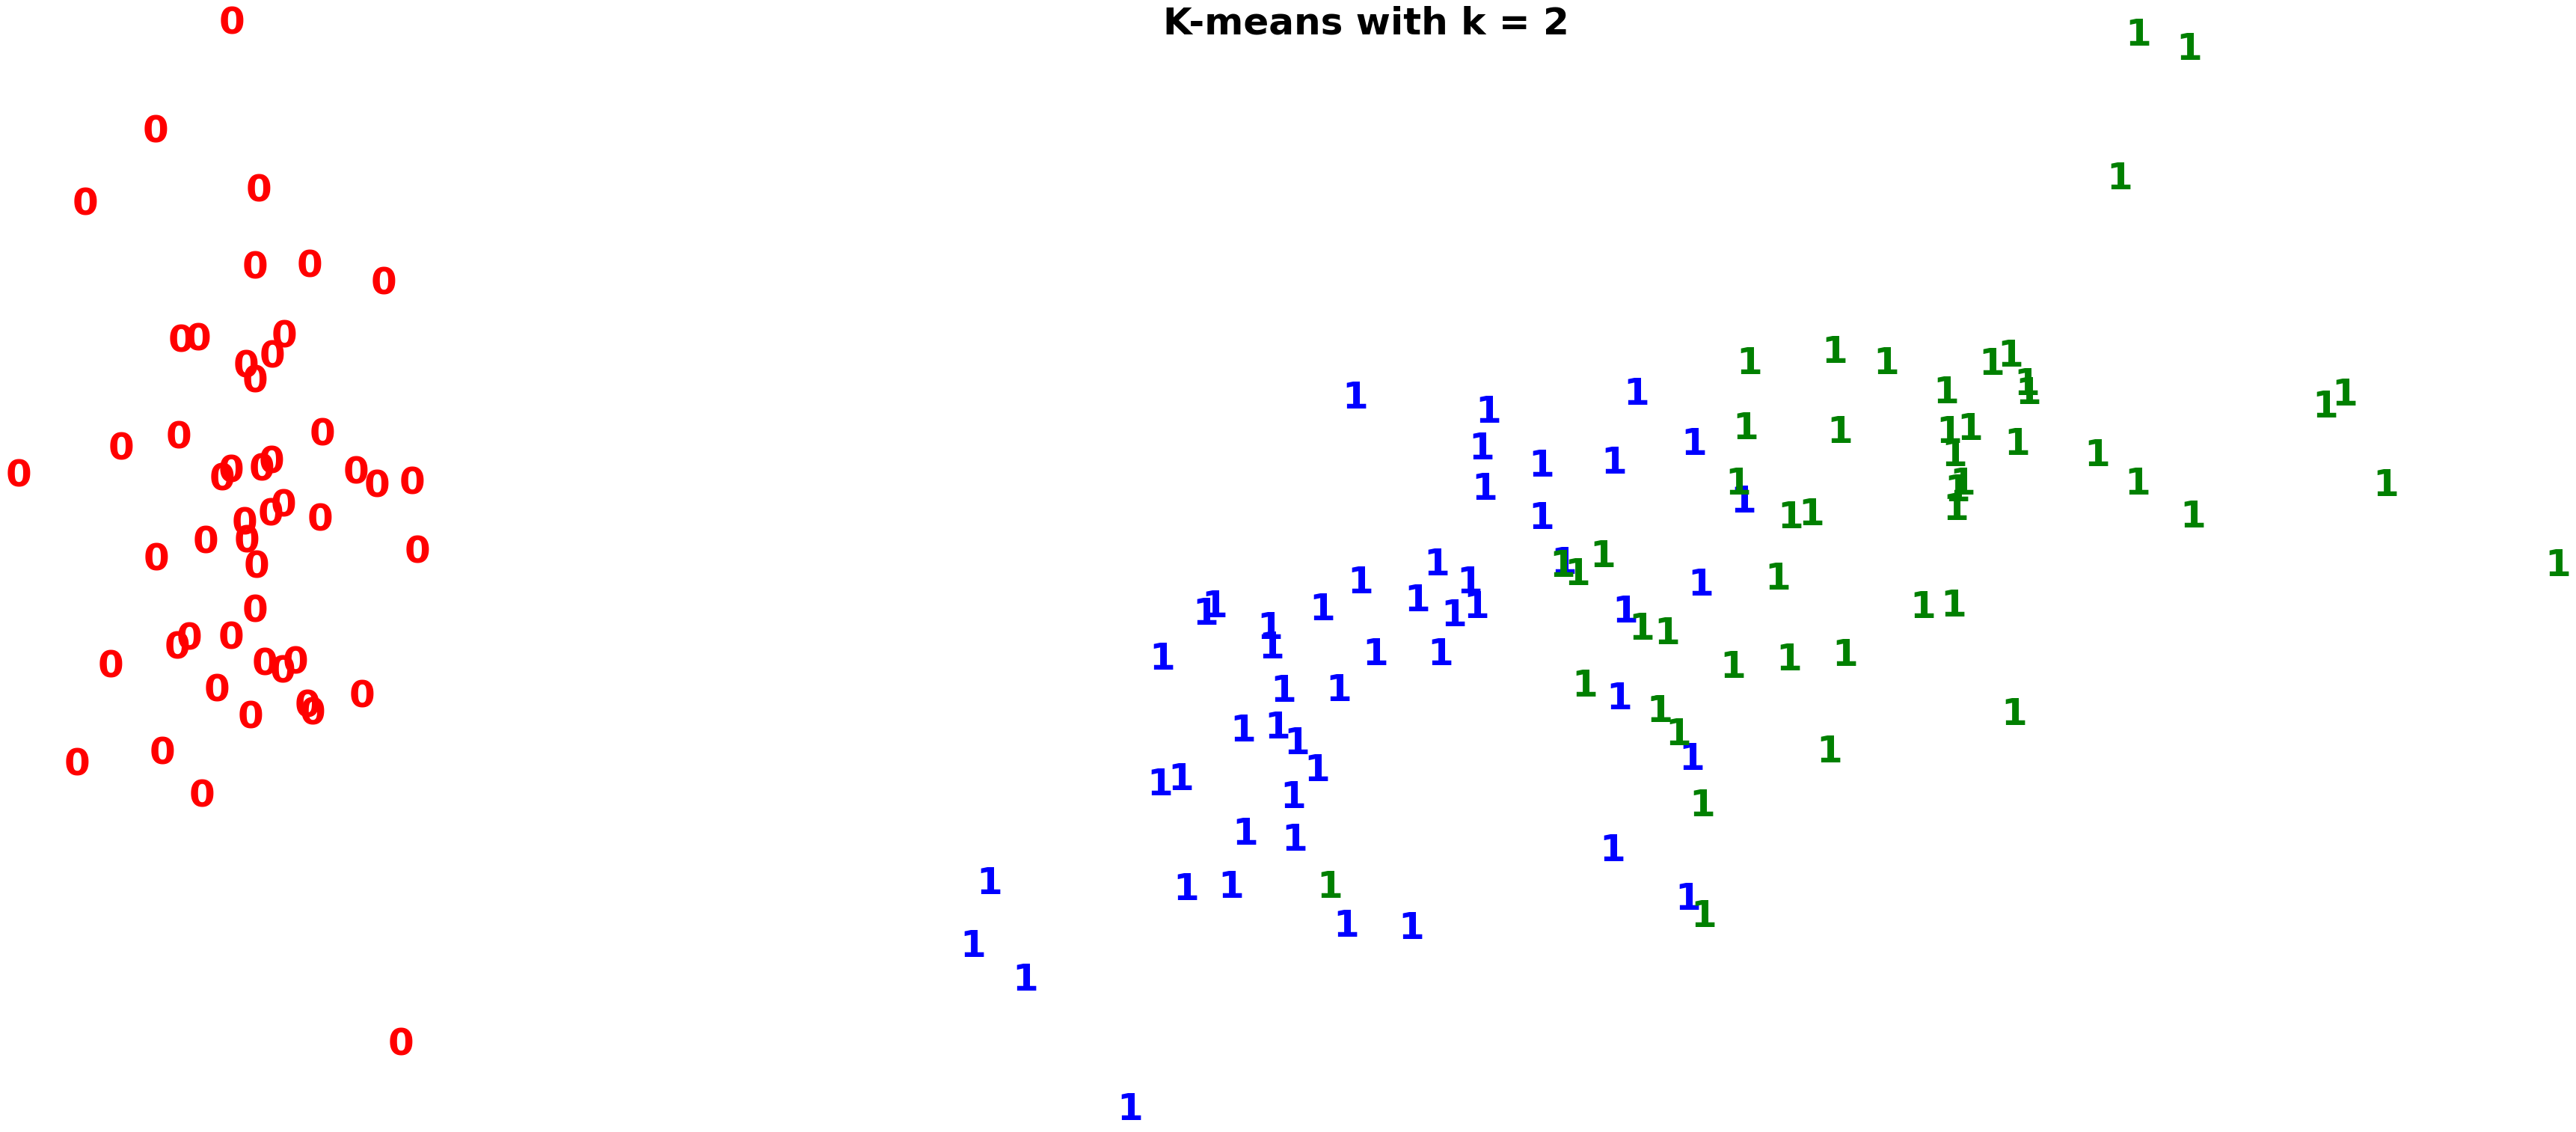

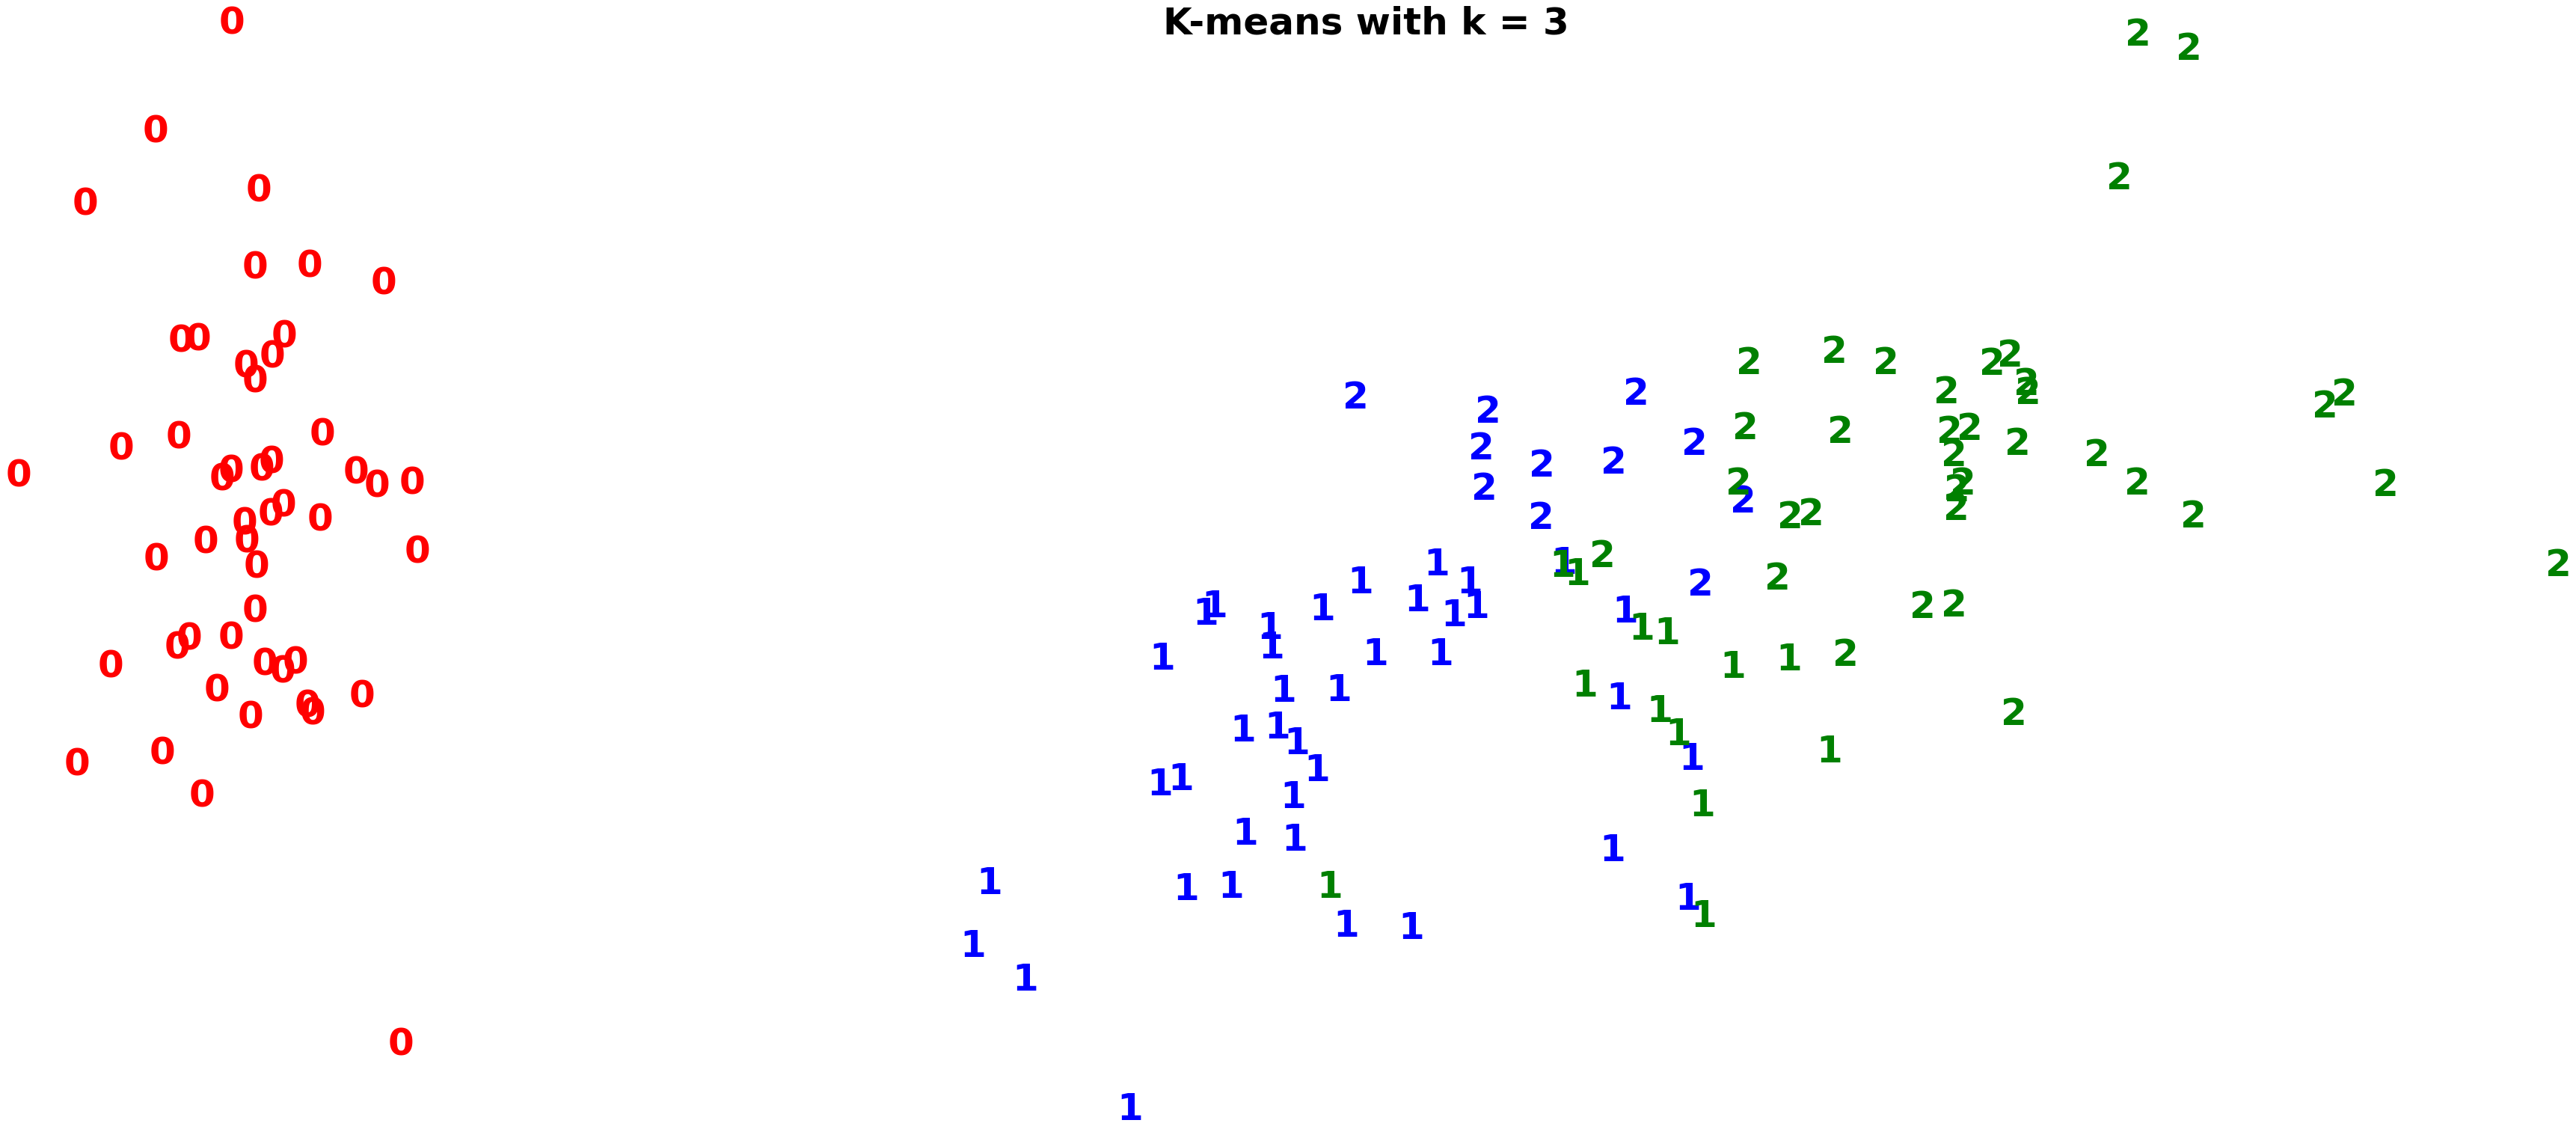

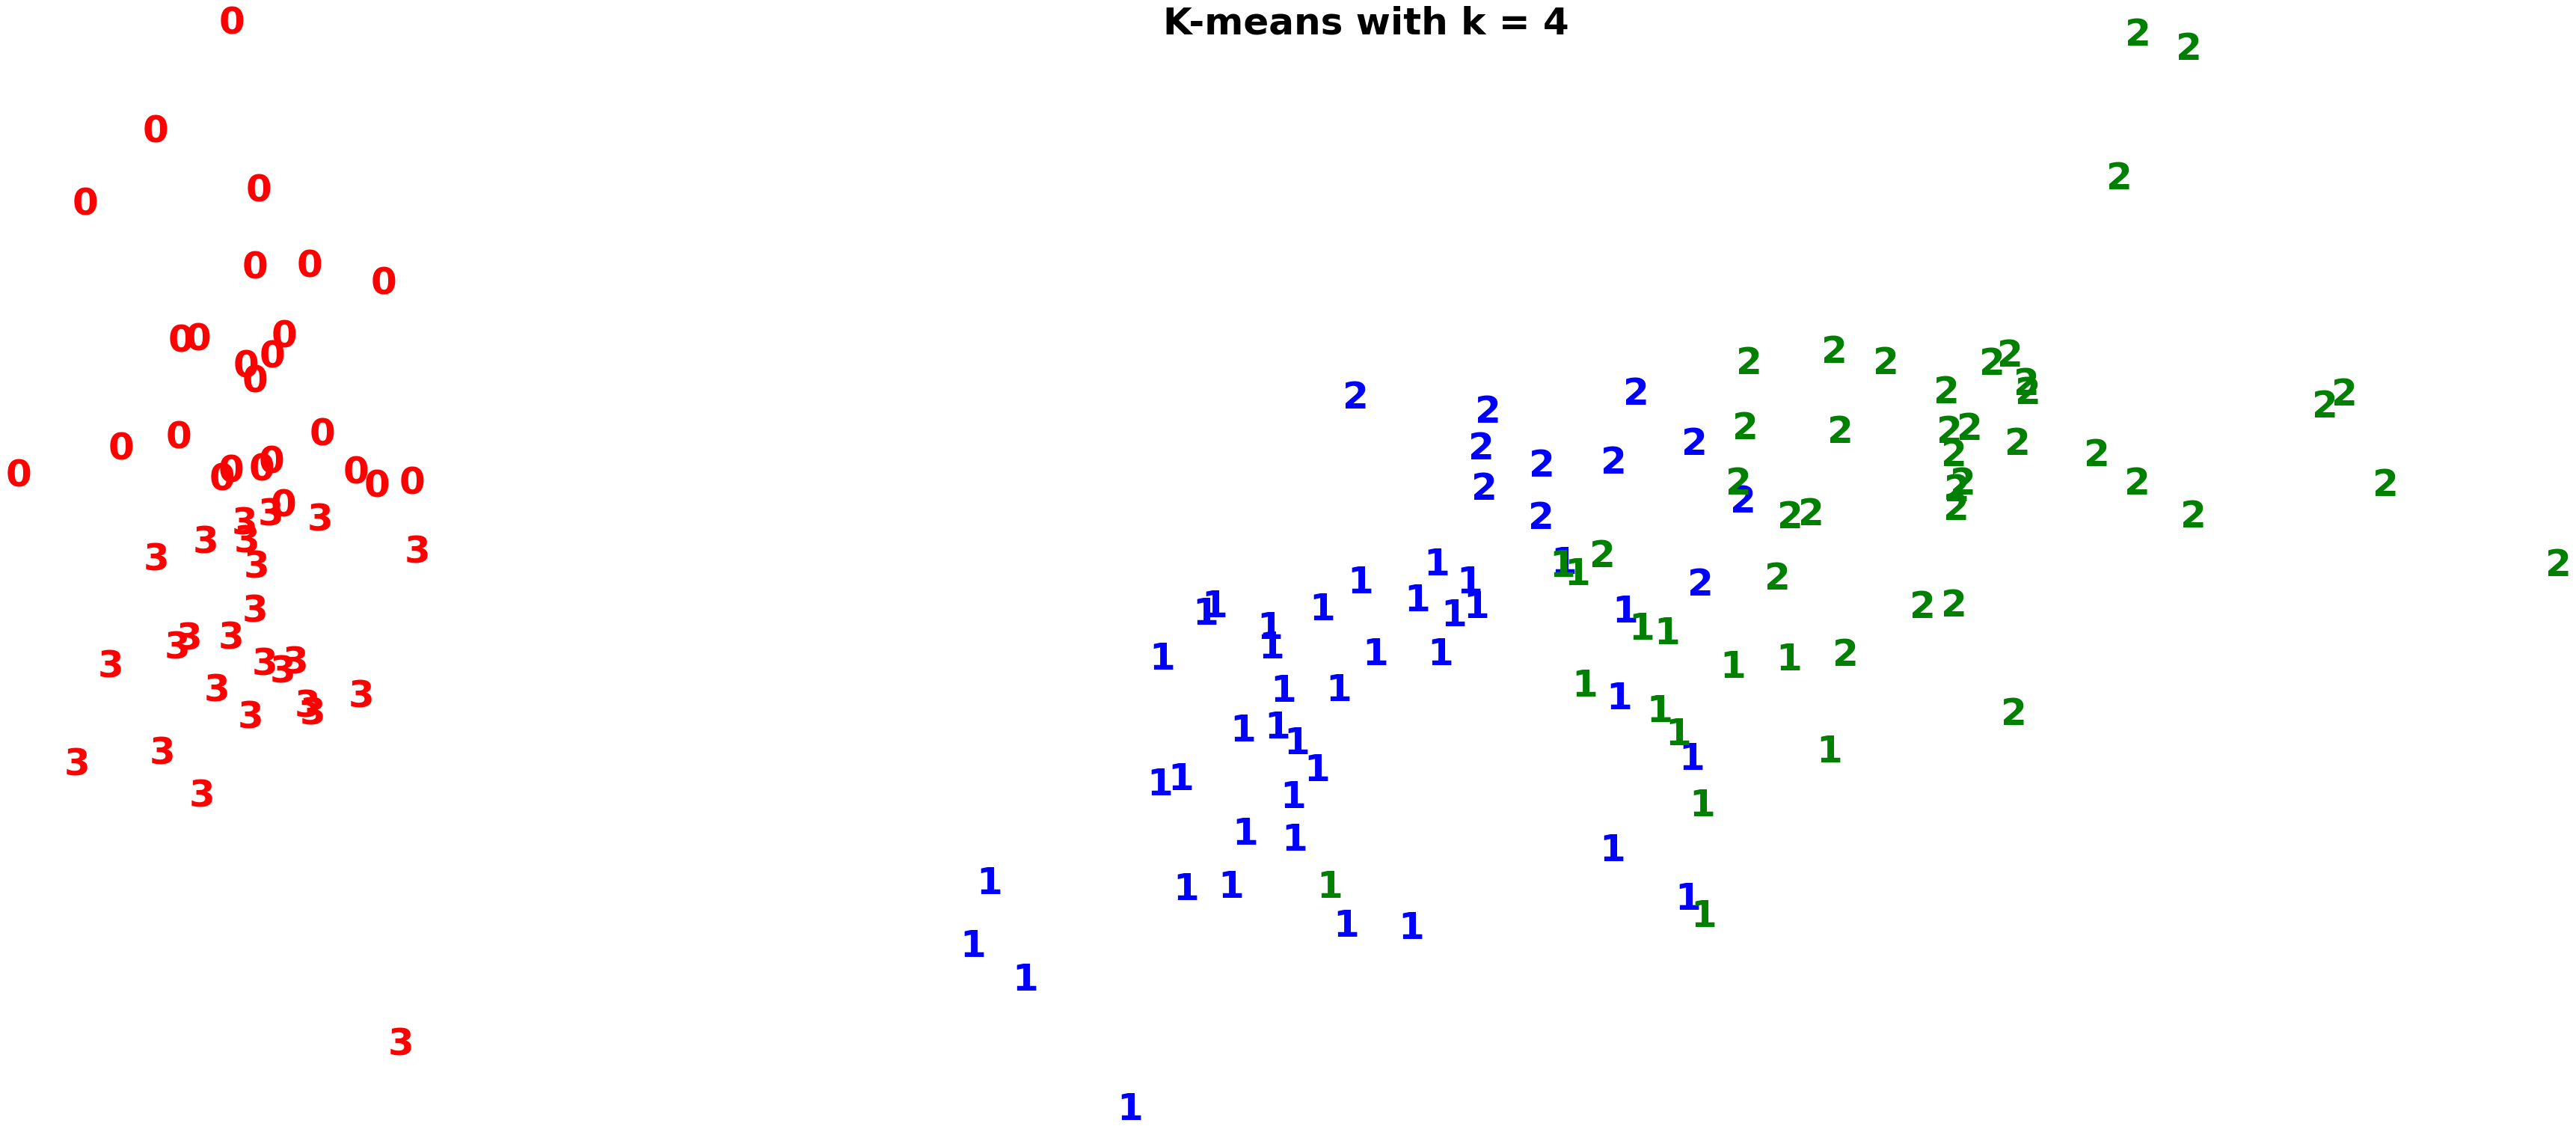

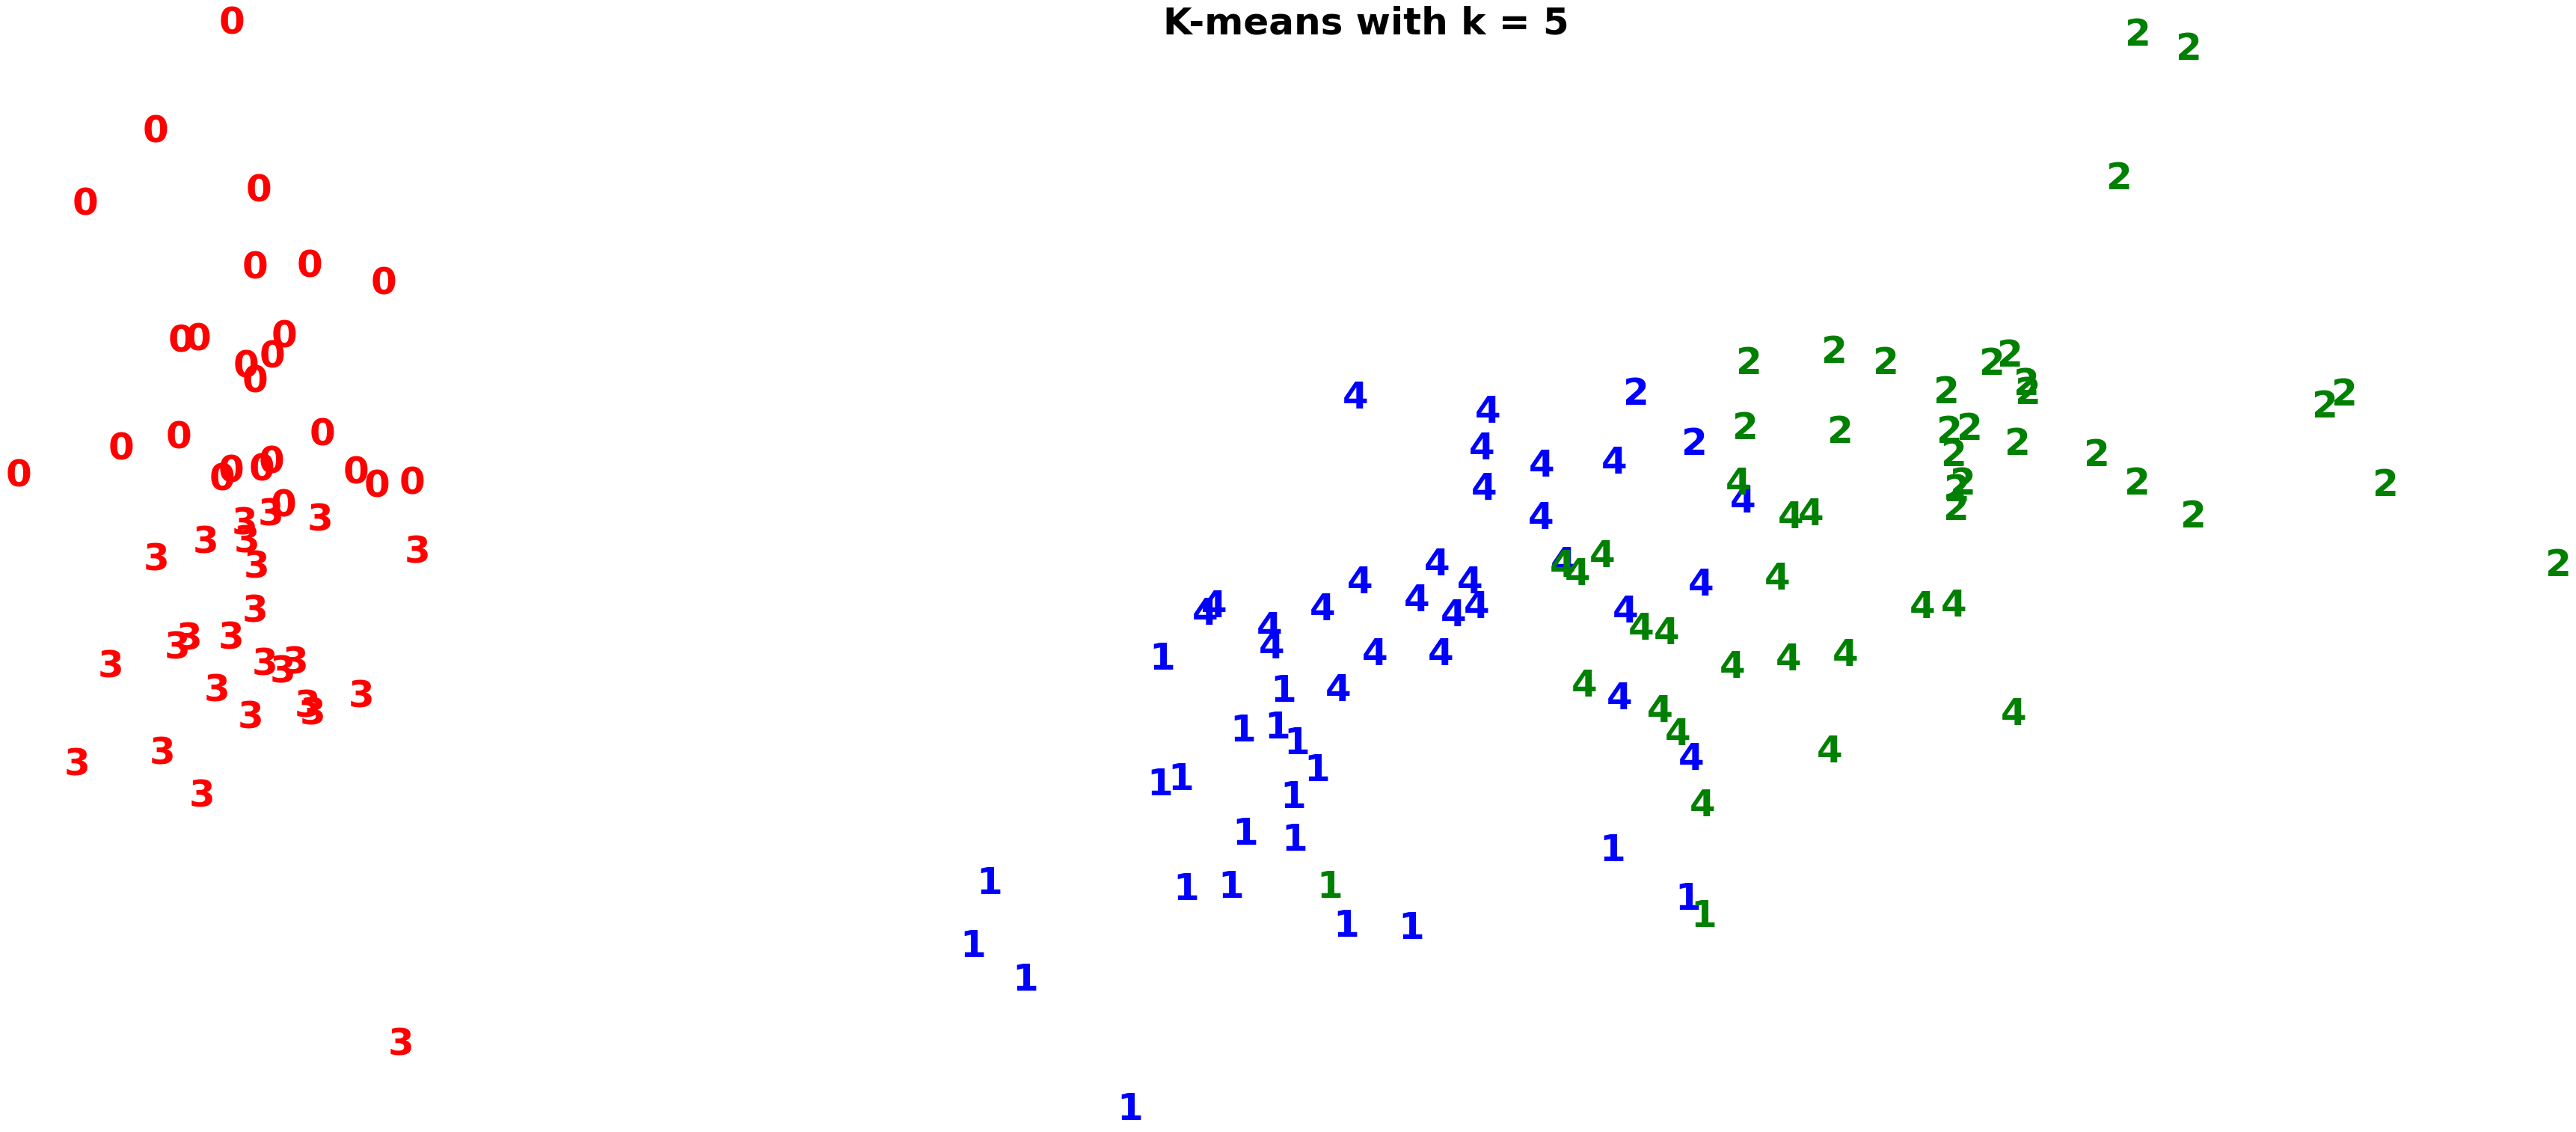

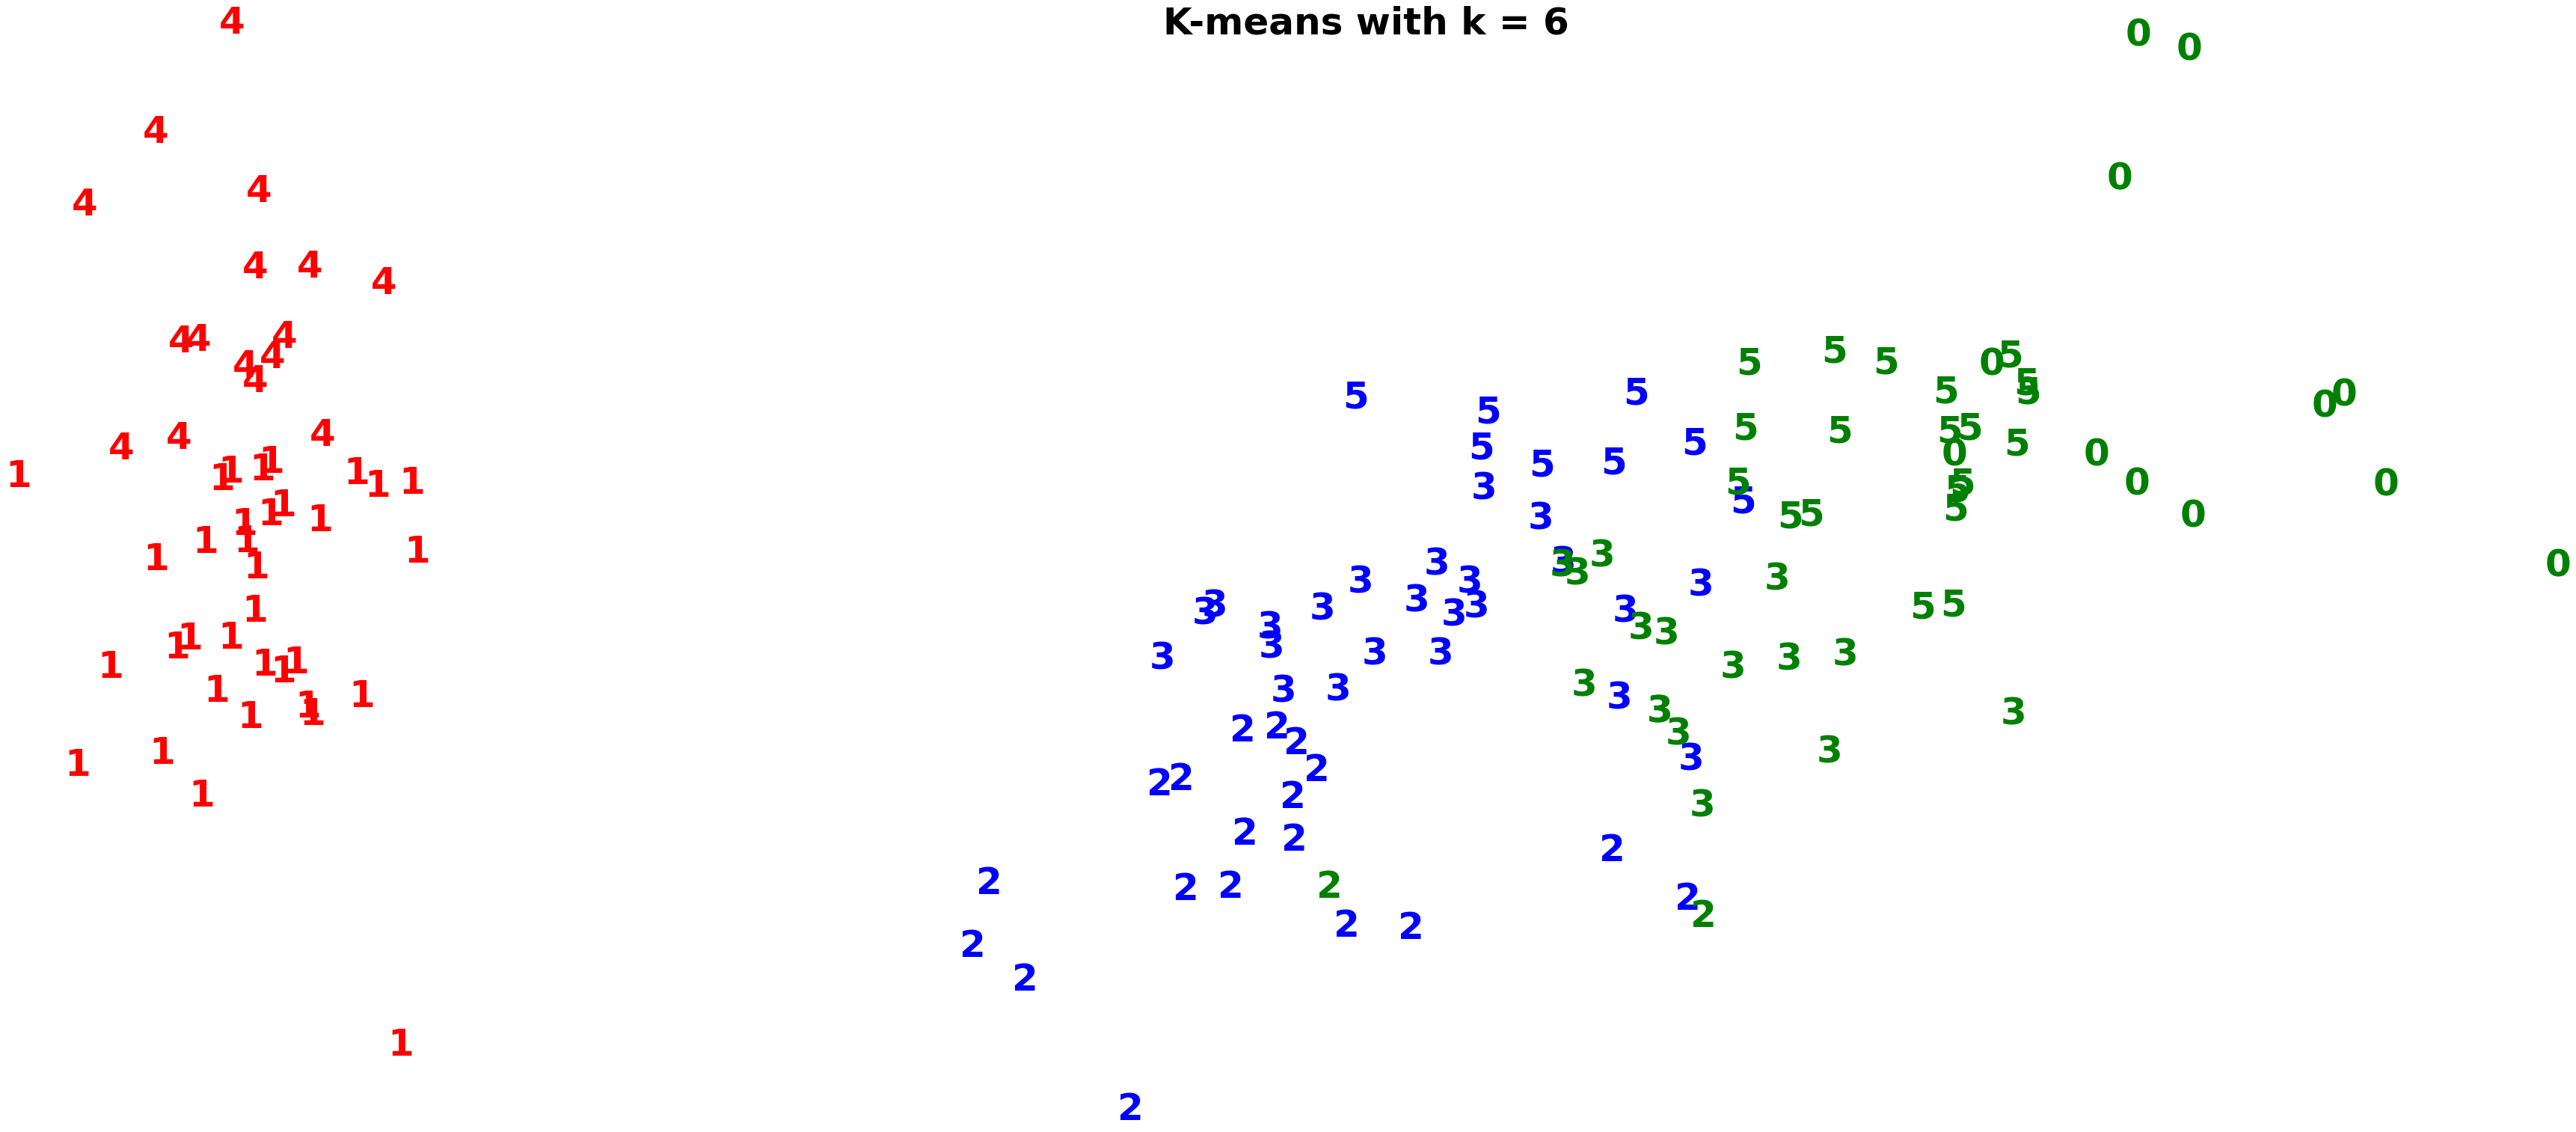

In [24]:
pca = PCA(n_components=2).fit_transform(X_scaled)

colours = 'rbg'
for i, solution in enumerate(kmeans_clust):
    plt.figure(figsize=(10,5))
    plt.text(np.mean(pca[:,0]), np.max(pca[:, 1]), "K-means with k = {}".format(num_clust[i]),
                 fontdict={'weight': 'bold', 'size': 50})
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(solution[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

Of the results, the most desirable outcome is for the 2 and 3 cluster models. When trying to fit more than 3 clusters to the data, the most easily seperable cluster, on the left in red, is broken up, and there doesn't appear any better seperation of the two clusters to the right.

2. Creat a K-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters. Note that in this case, we actually know the correct number of clusters in the data which is two. But, you'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will be blind to whether or not patients have heart disease.

In [30]:
postgres_user = config.user
postgres_pw = config.password
postgres_host = config.host
postgres_port = config.port
postgres_db = "heartdisease"

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [31]:
X = df.iloc[:,:13]
y = df.iloc[:,13]

In [36]:
X =X.replace(to_replace='?', value=0)
y = np.where(y>0,0,1)

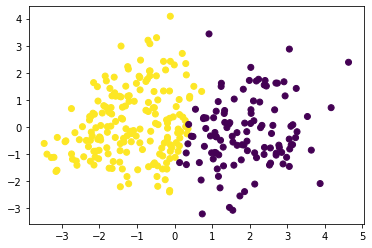

Comparison of k-means vs the data:
col_0    0    1
row_0          
0      101   13
1       38  151


In [37]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

X_pca = PCA(2).fit_transform(scaled)

y_pred = KMeans(n_clusters=2, random_state =123).fit_predict(scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c = y_pred)
plt.show()

print("Comparison of k-means vs the data:")
print(pd.crosstab(y_pred, y))

This model is classifying 252 cases correctly out of 